In [1]:
import numpy as np
import sklearn
assert sklearn.__version__ >= "0.20"
import sys
assert sys.version_info >= (3, 5)
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model
import matplotlib as mpl
from sklearn import datasets
import seaborn as sns
# import all the libraries used
import numpy as np # linear algebra
import pandas as pd # data processing, data manipulation 
#Indicating the plot is displayed directly below the code cell that produced it
%matplotlib inline 
import matplotlib.pyplot as plt # plot graphs 
import seaborn as sns # import seaborn library for statistical data visualization
from sklearn.model_selection import train_test_split # to split the data into test and train
#from sklearn.cross_validation import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn import svm # SVM
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import metrics # check the error and accuracy
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import RandomizedSearchCV
from sklearn.tree import plot_tree
import seaborn as sns
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [2]:
# loading the dataset
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
print(cancer.DESCR)


.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [3]:
# getting all attributes
cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
# getting target names
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# creating data frame
df = pd.DataFrame(np.c_[cancer['data'],cancer['target']],columns=np.append(cancer['feature_names'],['target']))

In [6]:
print(df)

     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mea

In [7]:
# splitting the data frame according to feature name and target value
can_A_df = pd.DataFrame(cancer.data, columns=cancer.feature_names)
can_B_df = pd.DataFrame(cancer.target, columns=["target"])
can_A_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [8]:
can_B_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 1 columns):
target    569 non-null int32
dtypes: int32(1)
memory usage: 2.3 KB



1. Radius : It is the distance from the centre to the points on the perimeter
2. Texture : It is found out by calculating the variance of the grey scale values in the component pixel
3. Perimeter : It is the total distance between the snake points .
4. Area :The sum of the  total number of pixels in the interior of the snake  and half of the pixels in the perimter.
5. Compactness : Calculated using the formula perimeter*perimeter / area.
6. Smoothness : It is the difference between the length of the radial line and the mean length of the lines surrounding it.
7. Concavity : These are the indentations in the cell nucleus.It is used to judge the shape of the cell.
8. Concave Points : It is the measure of the number of indentations in the cell nucleus.
9. Symmetry : Calculated by measuring the longest chord in the nucleus and then calculating the length difference between lines perpendicular to the major axis to the cell boundry in both the cellular directions.
10. Fractal Dimentions : It Is calculated using the Coastline Approximations i.e. dimensions along the edges of the cell nucleus to judge the amount of malignancy.

The mean, standard error  and maximum value are used for each image because the number of malignant cells occuring in the sample are relatively low hence these values are used to intutively determine the cancer cells.

##### Histograms of mean values

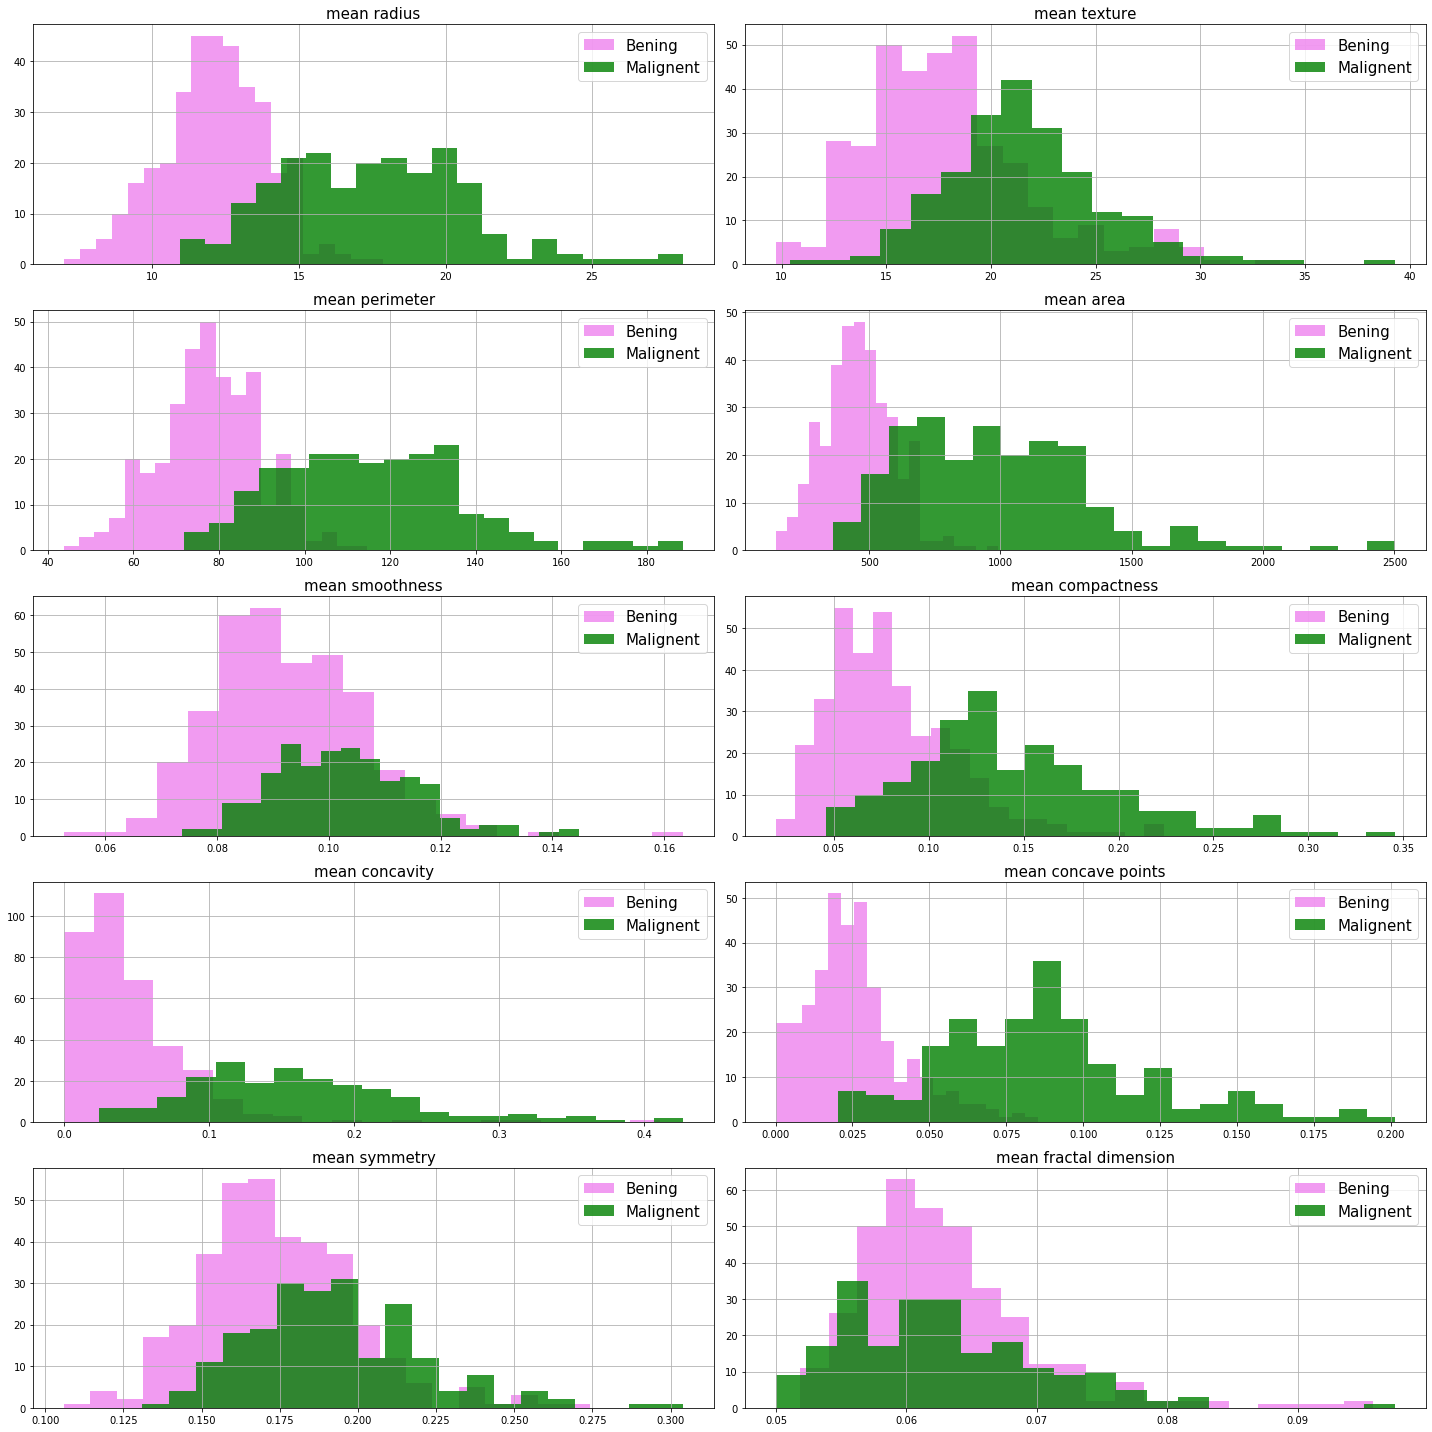

In [9]:
# plotting Histograms
import matplotlib.pyplot as plt
# 10 plots for mean
row  = 5 # mention the number of rows
col = 2  # mention the number of columns
t = 0 # starting point

# plot sub plots
fig,ax=plt.subplots(row,col,sharex=False, sharey=False,figsize=(20,20))


for x in range (0,row):
    for y in range(0,col):
        column=df.columns[t] # getting the columns
        # getting the malignant and the benign values from the data set
        malignant= can_A_df[can_B_df['target']==0].iloc[:,t]
        benign = can_A_df[can_B_df['target']==1].iloc[:,t]
        
        plt.title(column)
        # making the histograms
        benign.hist(bins=20,alpha=0.8,label="Bening",ax=ax[x,y],color = "violet")
        malignant.hist(bins=20,alpha=0.8,label="Malignent", ax=ax[x,y],color = "green")
        
        # give suitable legends and relevant title
        ax[x,y].legend(prop={'size': 15})
        ax[x,y].set_title(column,size=15)
        
        plt.tight_layout()
        t=t+1

##### Histograms of the error values

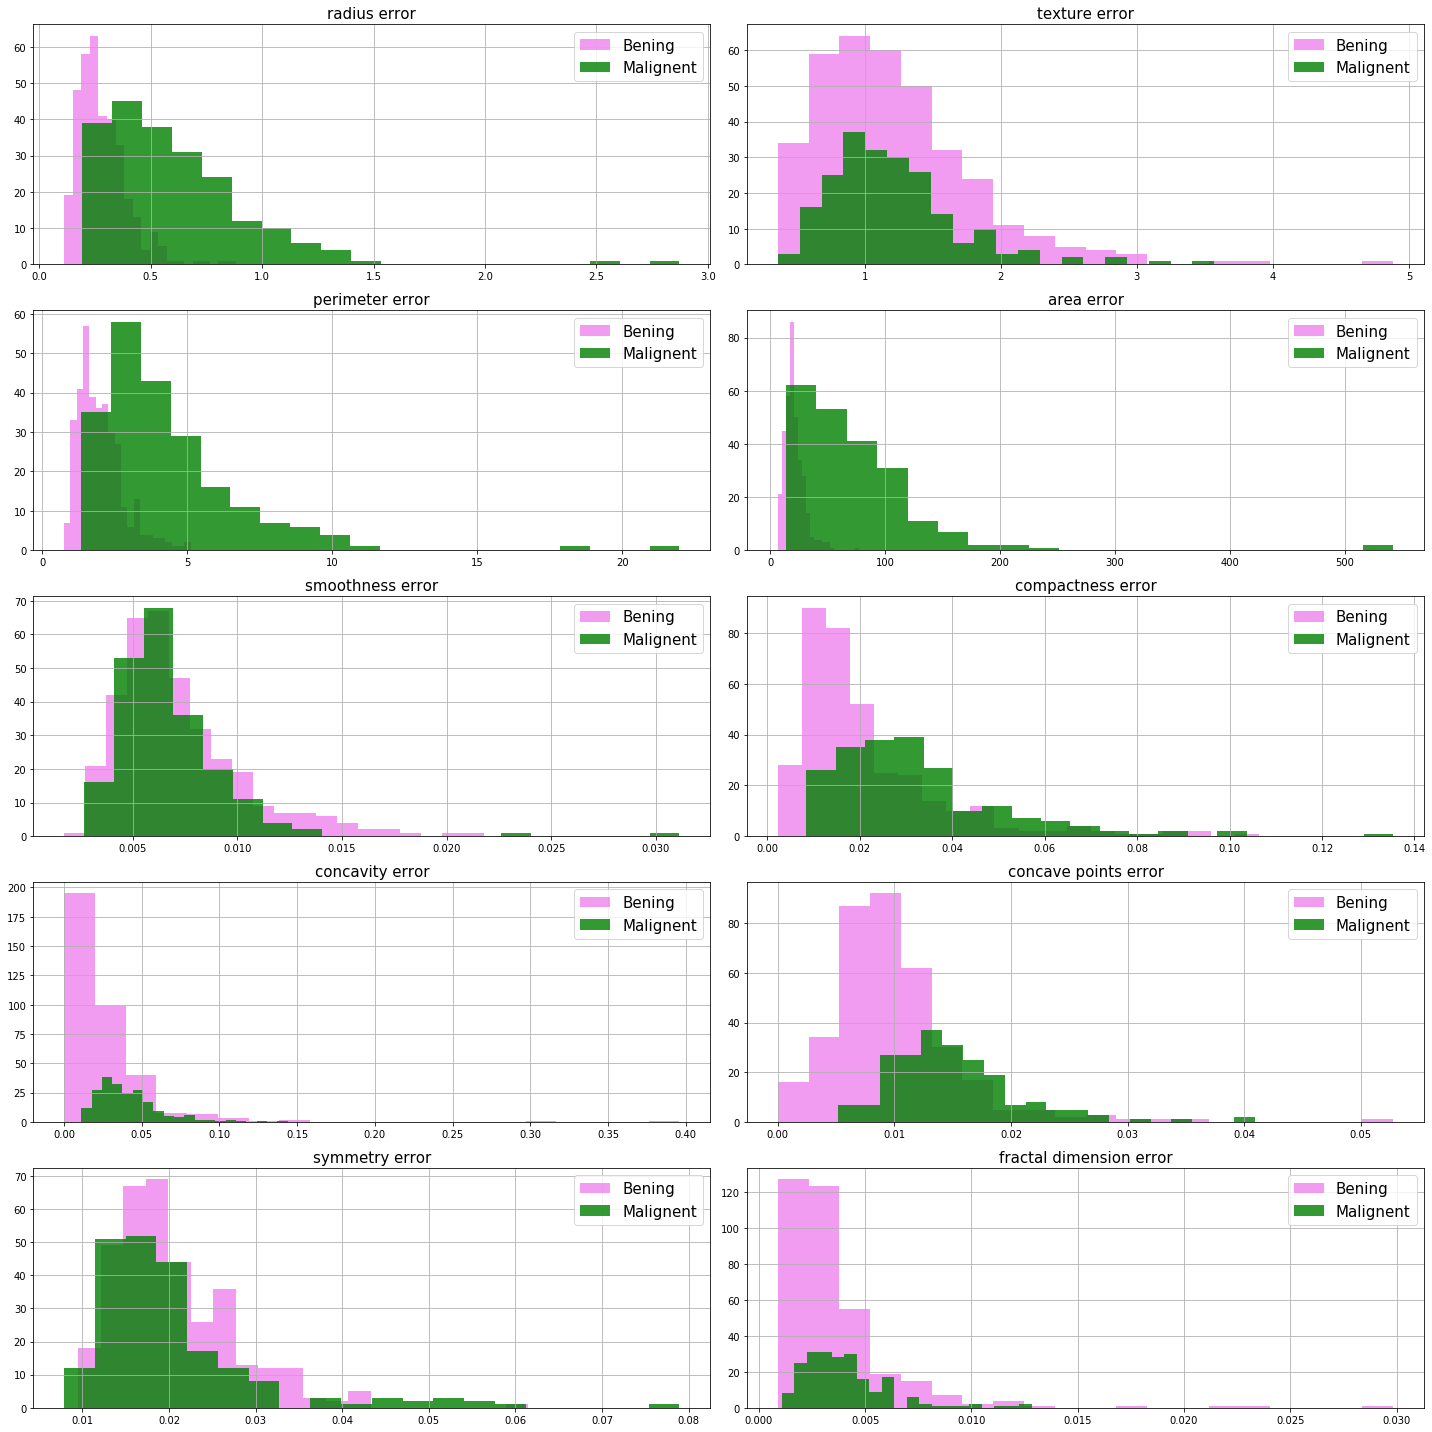

In [10]:
# plotting histogram subplots of error values
row=5
col=2
x=0
y=0

# getting next 10 rows
s=10       

fig,ax=plt.subplots(row,col,figsize=(20,20),sharex=False, sharey=False)

for x in range (0,row):
    for y in range(0,col):
        column=df.columns[s]
        
        malignant= can_A_df[can_B_df['target']==0].iloc[:,s]
        benign = can_A_df[can_B_df['target']==1].iloc[:,s]
        
        plt.title(column)
        
        benign.hist(bins=20,alpha=0.8,label="Bening",ax=ax[x,y],color = "violet")
        malignant.hist(bins=20,alpha=0.8,label="Malignent",ax=ax[x,y],color = "green")
        
        
        ax[x,y].legend(prop={'size': 15}) 
        ax[x,y].set_title(column,size=15)
        plt.tight_layout()
        s=s+1

##### Histograms of worst values

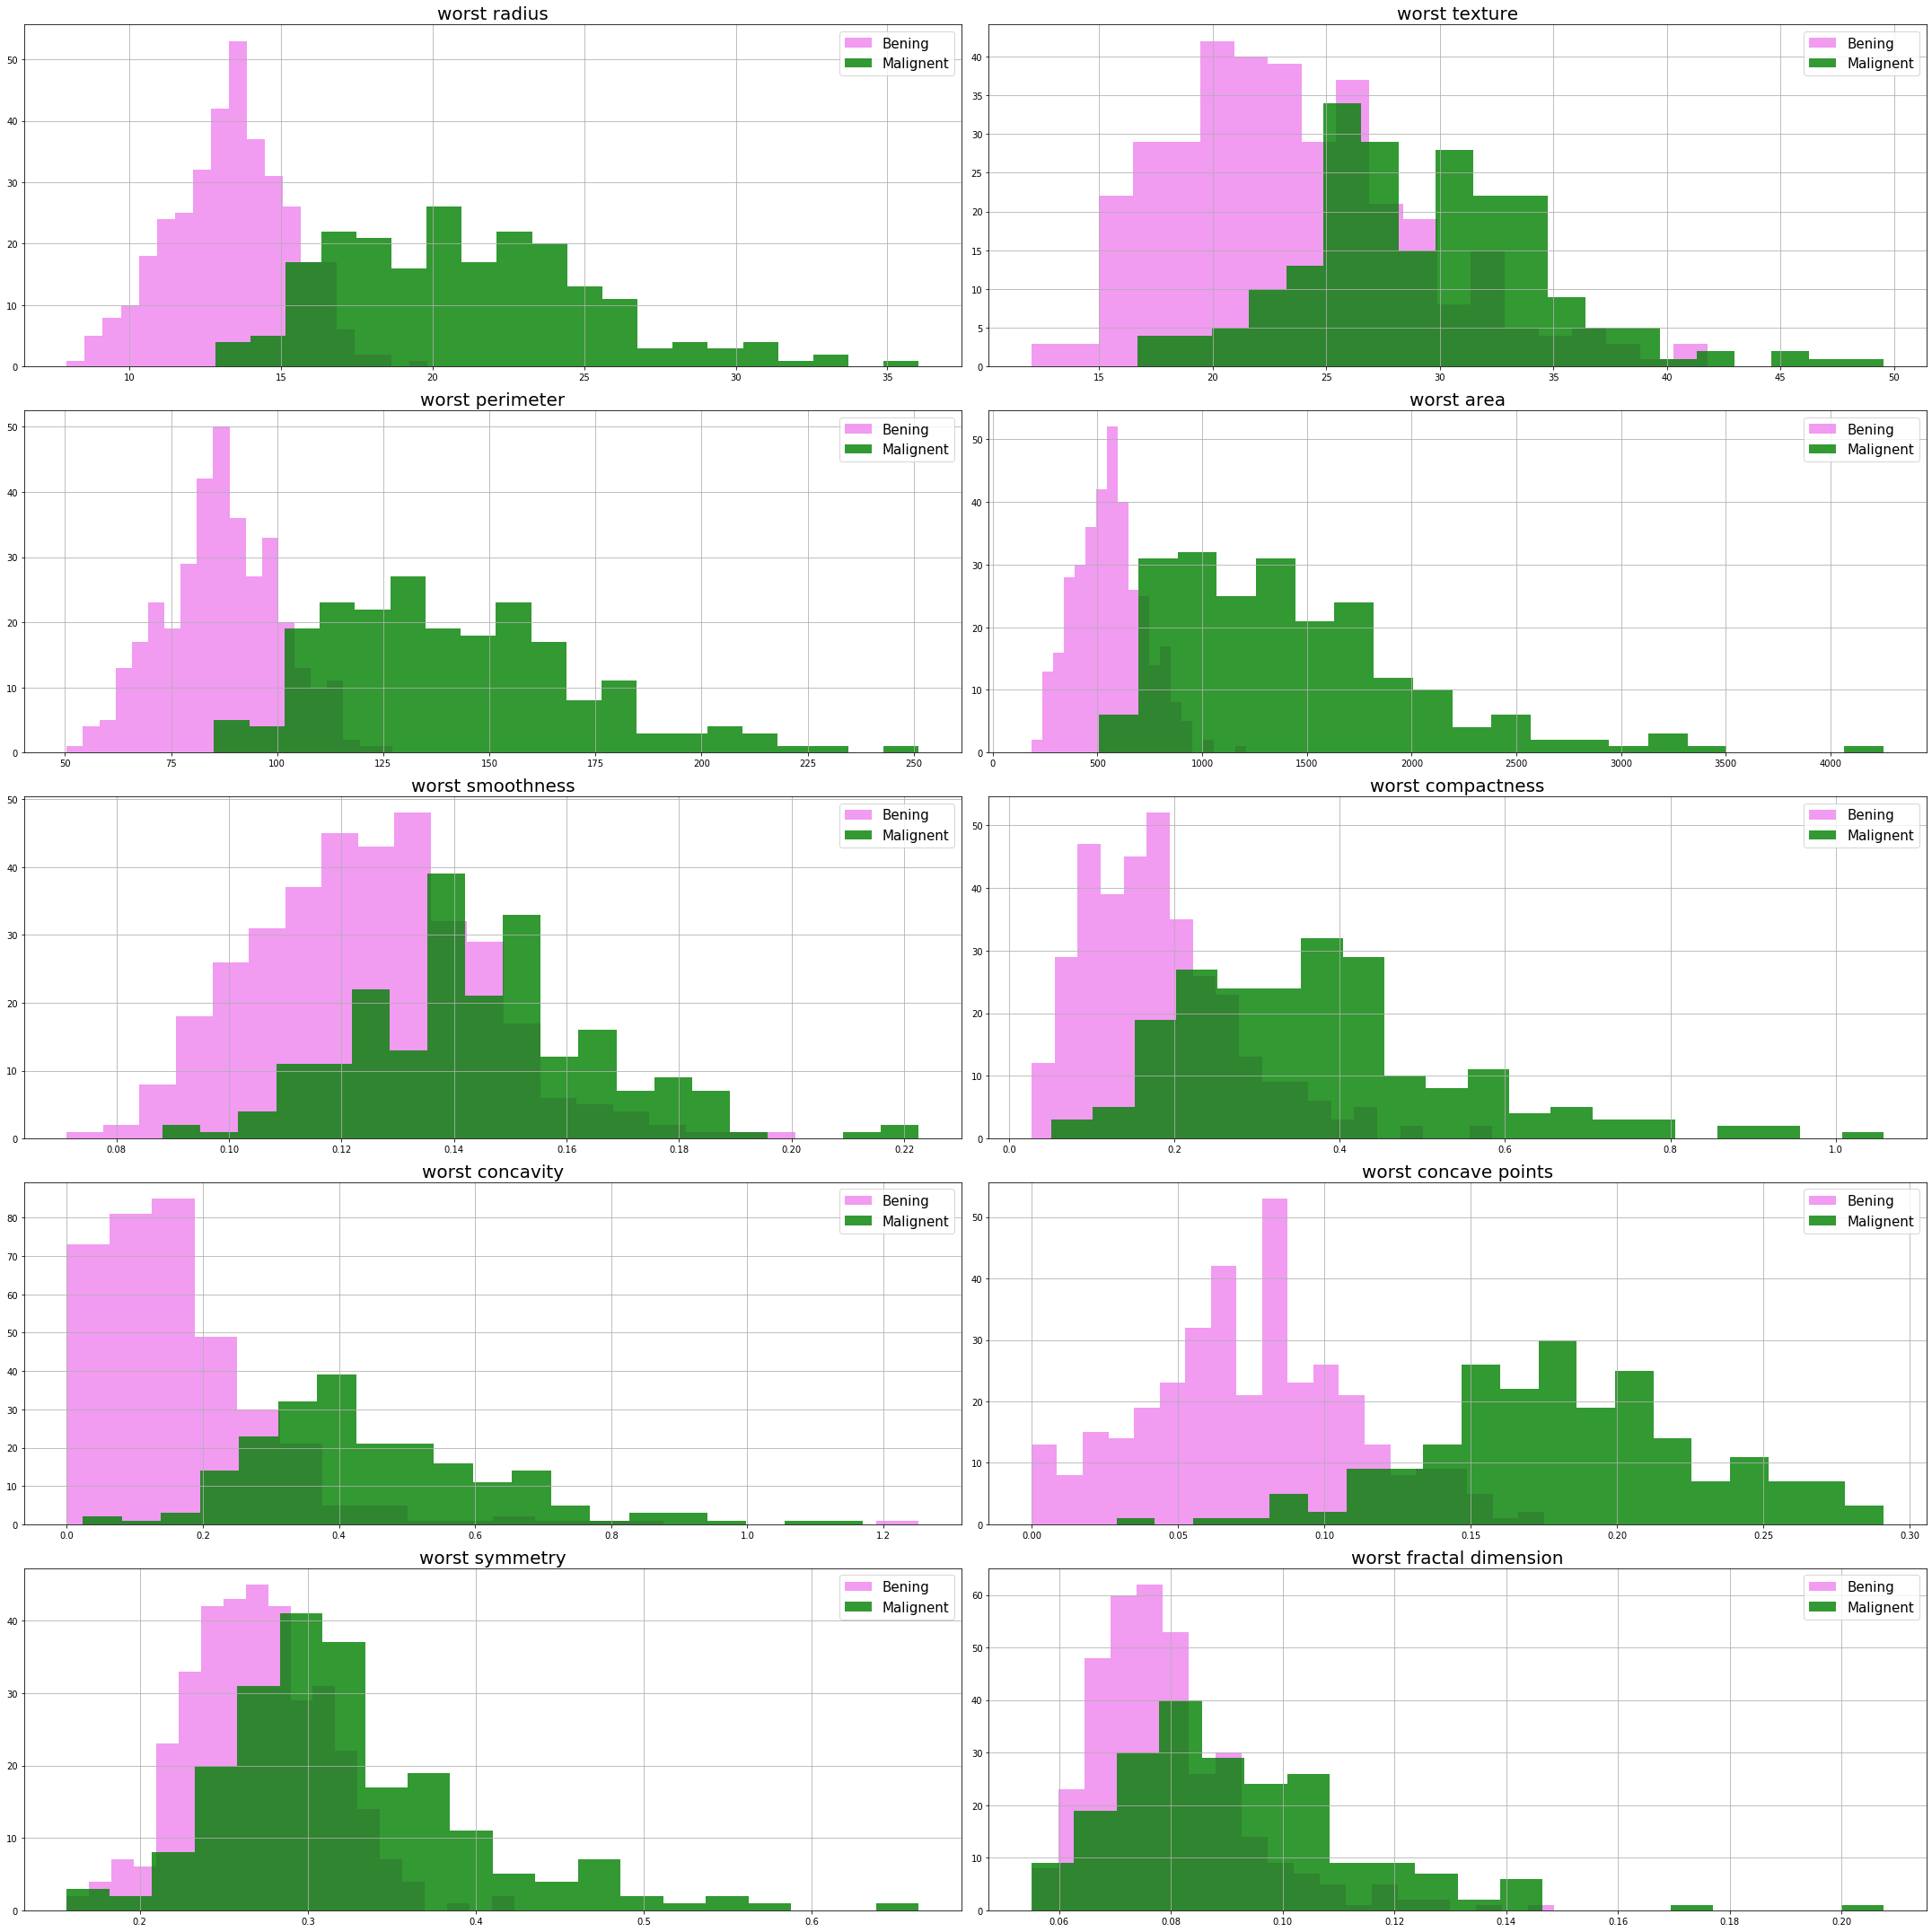

In [11]:
# plotting subplots of worst cases
row=5
col=2

r=20     

fig,ax=plt.subplots(row,col,figsize=(30,30),sharex=False, sharey=False)

for x in range (0,row):
    for y in range(0,col):
        column=df.columns[r]
        
        malignant= can_A_df[can_B_df['target']==0].iloc[:,r]
        benign = can_A_df[can_B_df['target']==1].iloc[:,r]
        
        plt.title(column)
        
        benign.hist(bins=20,alpha=0.8,label="Bening",ax=ax[x,y],color = "violet")
        malignant.hist(bins=20,alpha=0.8,label="Malignent",ax=ax[x,y], color = "green")
        
        
        ax[x,y].legend(prop={'size': 15})
        ax[x,y].set_title(column,size=20)
        plt.tight_layout()
        r=r+1

##### ROC curve of mean values

In [12]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score

from sklearn.metrics import roc_curve, auc

In [13]:
tp_rate = [] # creating empty list for true positiive rates 
fp_rate = [] # creating empty list for false positive rates
auc_score = [] # creating empty list for auc score

for x in range(0,10):
    A_df = can_A_df.iloc[:,x] # getting all rows
    fpr, tpr, thresholds = roc_curve(can_B_df,A_df)
    # add values to the list
    tp_rate.append(tpr)
    fp_rate.append(fpr)
    auc_val= auc(tpr, fpr)
    auc_score.append(auc_val)

In [14]:
l1 = np.linspace(0,1)
l2 = np.linspace(0,1)

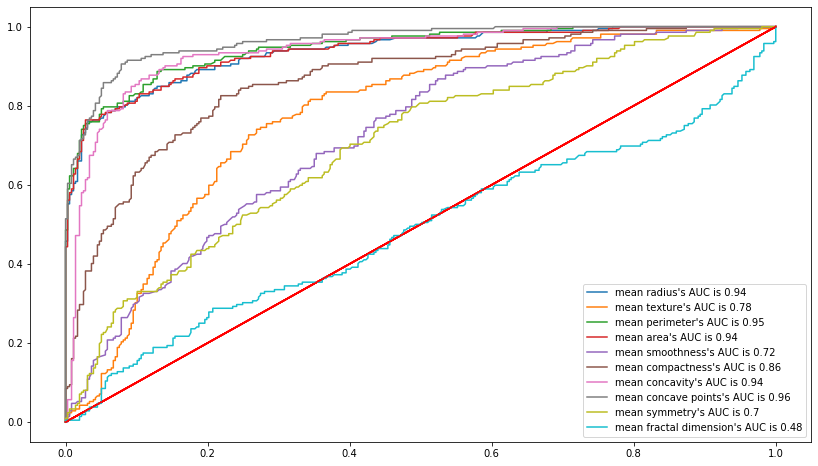

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 14, 8
area_is = '\'s AUC is '

for x in range (0,len(tp_rate)):
    column=str(can_A_df.columns[x]) +area_is+ str(round(auc_score[x],2))
    plt.plot(tp_rate[x],fp_rate[x],label=column)
    plt.plot(l1,l2, color='red')
    
    plt.legend()

##### AUC for mean vales

In [16]:
# area under the curve
t=0
for area in auc_score:
    column=can_A_df.columns[t]
    print("The AUC for "+str(column),"=",round(area,2))
    t=t+1

The AUC for mean radius = 0.94
The AUC for mean texture = 0.78
The AUC for mean perimeter = 0.95
The AUC for mean area = 0.94
The AUC for mean smoothness = 0.72
The AUC for mean compactness = 0.86
The AUC for mean concavity = 0.94
The AUC for mean concave points = 0.96
The AUC for mean symmetry = 0.7
The AUC for mean fractal dimension = 0.48


##### ROC for error values

In [17]:
tp_rate2 = []
fp_rate2 = []
auc_score2 = []
# auc1 = []
for x in range(10,20):
    A_df = can_A_df.iloc[:,x]
    fpr, tpr, thresholds = roc_curve(can_B_df,A_df)
    tp_rate2.append(tpr)
    fp_rate2.append(fpr)
    auc_val= auc(tpr, fpr)
    auc_score2.append(auc_val)

In [18]:
l1 = np.linspace(0,1,1000)
l2 = np.linspace(0,1,1000)

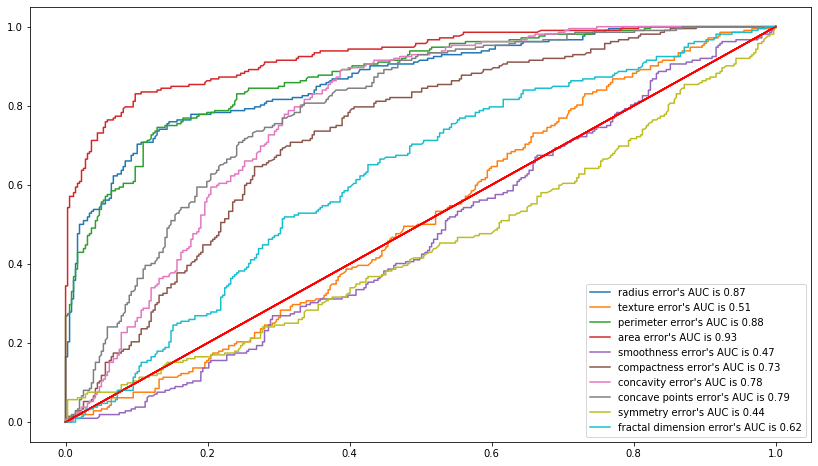

In [19]:
rcParams['figure.figsize'] = 14, 8
area_is = '\'s AUC is '

for x in range (0,len(tp_rate2)):
    column=str(can_A_df.columns[x+10]) +area_is+ str(round(auc_score2[x],2))
    plt.plot(tp_rate2[x],fp_rate2[x],label=column)
    plt.plot(l1,l2, color='red')

    plt.legend()

##### AUC for error values

In [20]:
# area under the curve
p=10
for area in auc_score2:
    column=can_A_df.columns[p]
    print("The AUC for "+str(column),"=",round(area,2))
    p=p+1

The AUC for radius error = 0.87
The AUC for texture error = 0.51
The AUC for perimeter error = 0.88
The AUC for area error = 0.93
The AUC for smoothness error = 0.47
The AUC for compactness error = 0.73
The AUC for concavity error = 0.78
The AUC for concave points error = 0.79
The AUC for symmetry error = 0.44
The AUC for fractal dimension error = 0.62


##### ROC for worst values 

In [21]:
tp_rate3 = []
fp_rate3 = []
auc_score3 = []
# auc1 = []
for x in range(20,30):
    A_df = can_A_df.iloc[:,x]
    fpr, tpr, thresholds = roc_curve(can_B_df,A_df)
    tp_rate3.append(tpr)
    fp_rate3.append(fpr)
    auc_val= auc(tpr, fpr)
    auc_score3.append(auc_val)

In [22]:
l1 = np.linspace(0,1,1000)
l2 = np.linspace(0,1,1000)

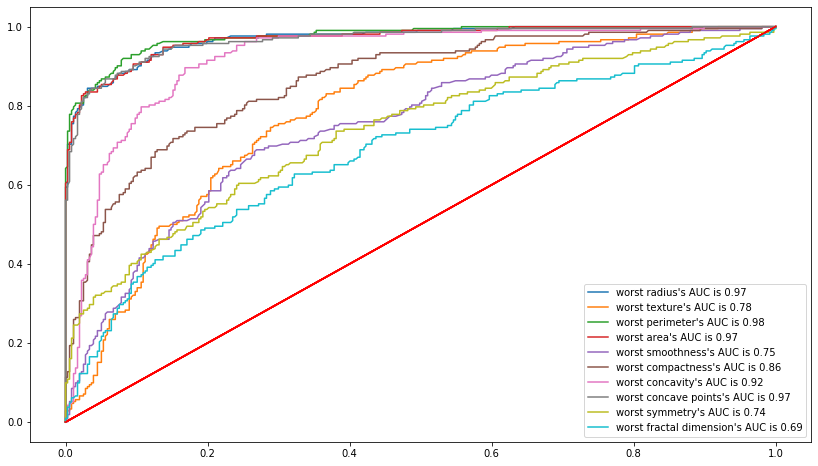

In [23]:
rcParams['figure.figsize'] = 14, 8
area_is = '\'s AUC is '

for x in range (0,len(tp_rate3)):
    column=str(can_A_df.columns[x+20]) +area_is+ str(round(auc_score3[x],2))
    plt.plot(tp_rate3[x],fp_rate3[x],label=column)
    plt.plot(l1,l2, color='red')

    plt.legend()

##### AUC for worst values

In [24]:
# area under the curve
q=20
for area in auc_score3:
    column=can_A_df.columns[q]
    print("The AUC for "+str(column),"=",round(area,2))
    q=q+1

The AUC for worst radius = 0.97
The AUC for worst texture = 0.78
The AUC for worst perimeter = 0.98
The AUC for worst area = 0.97
The AUC for worst smoothness = 0.75
The AUC for worst compactness = 0.86
The AUC for worst concavity = 0.92
The AUC for worst concave points = 0.97
The AUC for worst symmetry = 0.74
The AUC for worst fractal dimension = 0.69



- According to the plotted histogram and the ROC curves the most promising characters are calculated by observing the area under the ROC curves . The attributes with the higher values of AUC are more promising than the rest of the values.This is so because the precision and recoil scores will be high for higher AUC and hence such a feature will be important than the rest.
- The further away the plot is from the red straight line the better the feature is . Hence greater the seperation better the value.
- The top 5 values are as follows :
   1. Worst Perimeter
   2. Worst Radius 
   3. Worst Concave Points
   4. Wors Area
   5. Mean Concave Points

Analysis Point: Calculate the mean of all instances of the malignant class (centre of mass in high dimensional feature space) and the mean of all instances of the benign class. Save the mean between those two as the “Analysis Point”. It is a point in the feature space that is approximately between both classes.

In [25]:
# analysis point
class dict_A(dict):
    def __init__(self):
        self = dict()
        
    def su(self,key,value):
        self[key] = value

ana_pt = []
dict_cancer = dict_A()

for  x in range(0,30):
    malignant=can_A_df[can_B_df['target']==0].iloc[:,x]
    benign=can_A_df[can_B_df['target']==1].iloc[:,x]
    # calculating mean of all instances of malignant class
    mal_mean=malignant.mean()
    # calculating mean of all instances of benign class
    ben_mean=benign.mean()
    # calculating analysis point
    mean_list=round((mal_mean+ben_mean)*0.5,2)
    # add the analysis points to the list
    dict_cancer.su(df.columns[x],mean_list)
    ana_pt.append(mean_list)
# get the output
for (key,value) in dict_cancer.items():
    print(key,value)



mean radius 14.8
mean texture 19.76
mean perimeter 96.72
mean area 720.58
mean smoothness 0.1
mean compactness 0.11
mean concavity 0.1
mean concave points 0.06
mean symmetry 0.18
mean fractal dimension 0.06
radius error 0.45
texture error 1.22
perimeter error 3.16
area error 46.9
smoothness error 0.01
compactness error 0.03
concavity error 0.03
concave points error 0.01
symmetry error 0.02
fractal dimension error 0.0
worst radius 17.26
worst texture 26.42
worst perimeter 114.19
worst area 990.59
worst smoothness 0.13
worst compactness 0.28
worst concavity 0.31
worst concave points 0.13
worst symmetry 0.3
worst fractal dimension 0.09


Constructing a decision tree classifier using the gini criterion and random_state=0. Below, i will perform a hyper parameter search of max_depth and min_samples_leaf. Checking the following remaining parameters of the classifier and either keep the default value or select a different value: min_samples_split, min_weight_fraction_leaf, max_features, max_leaf_nodes, min_impurity_decrease, min_impurity_split and class_weight. Question: Describe each choice briefly in one sentence.

In [26]:
# training ddecision tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV

In [27]:
X = df.iloc[:,0:30]
Y = df['target']



In [28]:
X_train, X_test, y_train, y_test = train_test_split(can_A_df, can_B_df, test_size=0.5, random_state=0)

In [29]:
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=0)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

__I have now entered different values for max_depth and min_sample_leaf before fitting the model. And then I have calculated the accuracy score__

In [30]:
y_pred=dtree.predict(X_test)

In [31]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)


0.9298245614035088


In [32]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test, y_pred)

0.9408602150537635

In [33]:
recall_score(y_test, y_pred)

0.9510869565217391

In [34]:
# hyper parameter search
max_depth = [int(x) for x in range(1, 10)]
min_samples_leaf = [int(x) for x in range(1, 10)]

# Create the dictionary 
random_values = {'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf}

In [35]:
randomsearch=RandomizedSearchCV(DecisionTreeClassifier(criterion='gini',random_state=0,class_weight='balanced'),param_distributions=random_values,n_jobs=-1)

In [36]:
randomsearch.fit(X_train,y_train)

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


RandomizedSearchCV(cv='warn', error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=0,
                                                    splitter

In [37]:
randomsearch.best_params_

{'min_samples_leaf': 7, 'max_depth': 6}


- max_depth= The maximum growth of the tree is called max_depth, random search is used to determine the best parameter.For large data sets the modelctends to overfit.
- min_samples_leaf= Leaf node having minimum number of data points. Random search is used to determine the values.For a low value the model has a tendency to overfit.
- min_samples_split= It has a default value of 2. This indicates the minimum splits of the root node.The reason for selecting a default value is that the model tends to overfit or under fit the dataset,when we have selected a value from min_sample_leaf,min_sample_split. 
- min_weight_fraction_leaf=Here we select the default value of 0.This is because the min_sample_leaf and the min_weight_fraction_leaf require a fraction of samples in each leaf.Because we have already given values to min_sample_leaf we keep the other values unchanged. 
- Max_features= Removing samples can cause the accuracy to lessen hence we select all the features during our searches.
- min_impurity_decrease= It controls the depth of tree depending upon the impurity of the samples.Because the value given max_depth is good we wont change min_impurity_derease_value. .
- Class_weight= It causes distribution of class based on the weight of each sample at each node. Due to class imbalance we set this value to balanced.

Building a pipeline including any pre-processing steps  necessary.

In [38]:
# pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
pipeline=Pipeline([("sc",StandardScaler()) , ('dt_classifier',DecisionTreeClassifier(criterion='gini',random_state=0))])

In [39]:
pipeline.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('sc',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('dt_classifier',
                 DecisionTreeClassifier(class_weight=None, criterion='gini',
                                        max_depth=None, max_features=None,
                                        max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort=False, random_state=0,
                                        splitter='best'))],
         verbose=False)

In [40]:
accuracy=pipeline.score(X_test,y_test)
print(accuracy)

0.9298245614035088


In [41]:
y_pred = pipeline.predict(X_test)
precision_score(y_test, y_pred)

0.9408602150537635

In [42]:
recall_score(y_test,y_pred)

0.9510869565217391

Performing Grid Search

In [43]:
# grid search
from sklearn.model_selection import GridSearchCV
max_depth = [int(x) for x in range(1, 30)]
min_samples_leaf = [int(x) for x in range(1, 30)]

# Create the dictionary 
grid_values = {'max_depth': max_depth,
            'min_samples_leaf': min_samples_leaf}

In [44]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings('ignore')
    warnings.filterwarnings(action='ignore',category=DeprecationWarning)
    warnings.filterwarnings(action='ignore',category=FutureWarning)

In [45]:
# perform grid search
gridsearch=GridSearchCV(DecisionTreeClassifier(criterion='gini',random_state=0,class_weight='balanced'),param_grid=grid_values,cv=5,n_jobs=-1)

In [46]:
# fit the data
gridsearch.fit(X_train,y_train)

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=0,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17

In [47]:
# grid search best parameters
gridsearch.best_params_

{'max_depth': 5, 'min_samples_leaf': 1}

- The Hyperparameter values are max_depth = 5 and min_sample_leaf = 1.
- These hyperparameter values will now be used to train the model in best possible way.

In [48]:
# decision tree
dtree = DecisionTreeClassifier(criterion = 'gini', random_state=0,max_depth = 5,min_samples_leaf = 1)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=0, splitter='best')

In [49]:
# precision

y_pred = dtree.predict(X_test)
precision_score(y_test, y_pred)

0.9358288770053476

In [50]:
# recoil
recall_score(y_test,y_pred)

0.9510869565217391

In [51]:
# accuracy
accuracy=dtree.score(X_test,y_test)
print(accuracy)

0.9263157894736842


Evaluating Decision Tree Classifier

In [52]:
# confusion matrix
confusion_matrix(y_test,y_pred)

array([[ 89,  12],
       [  9, 175]], dtype=int64)

In [53]:
# precision
from sklearn.metrics import precision_score,recall_score
precision_score(y_test, y_pred)

0.9358288770053476

In [54]:
# recoil
recall_score(y_test, y_pred)

0.9510869565217391

In [55]:
# accuracy
accuracy = round(metrics.accuracy_score(y_test, y_pred),4)
print('Accuracy score on training data : ',accuracy)

Accuracy score on training data :  0.9263


 On the basis of the confusion matrx the chance of failing to detect a sample with cancer i.e. False Positive rate is 12 i.e. out of total number of samples 12 will be detected as having cancer even if these samples dont have cancer.This metric of the decision tree classifier lets ups predict the True positive ,False negative ,True negative and False negaive values of the classifier.
Probabily of failing to detect a sample with cancer is 100-95 = 5%
- The strength of the decision tree classifier is that it requires very little data for preperation and may not require scaling or centering .
- A decision tree classifier is able to handle both classification and regression analysis of the data.
- Weakness of a decision tree is that it is prone to overfitting the data, which is unsuitable.Hence this can be managed by restricting the freedm during training the data, which can be done by regularizing the hyperparameters.Such as reduing the maximum depth of the decision tree .Recall score can be further improved because failing to detect the cancer should be minimum.

3.2	Display decision tree using plot_tree(). Question: Describe the structure. What do each of the entries in the first node mean? Are the features in the decision tree matching the initial candidate features from Section 1?

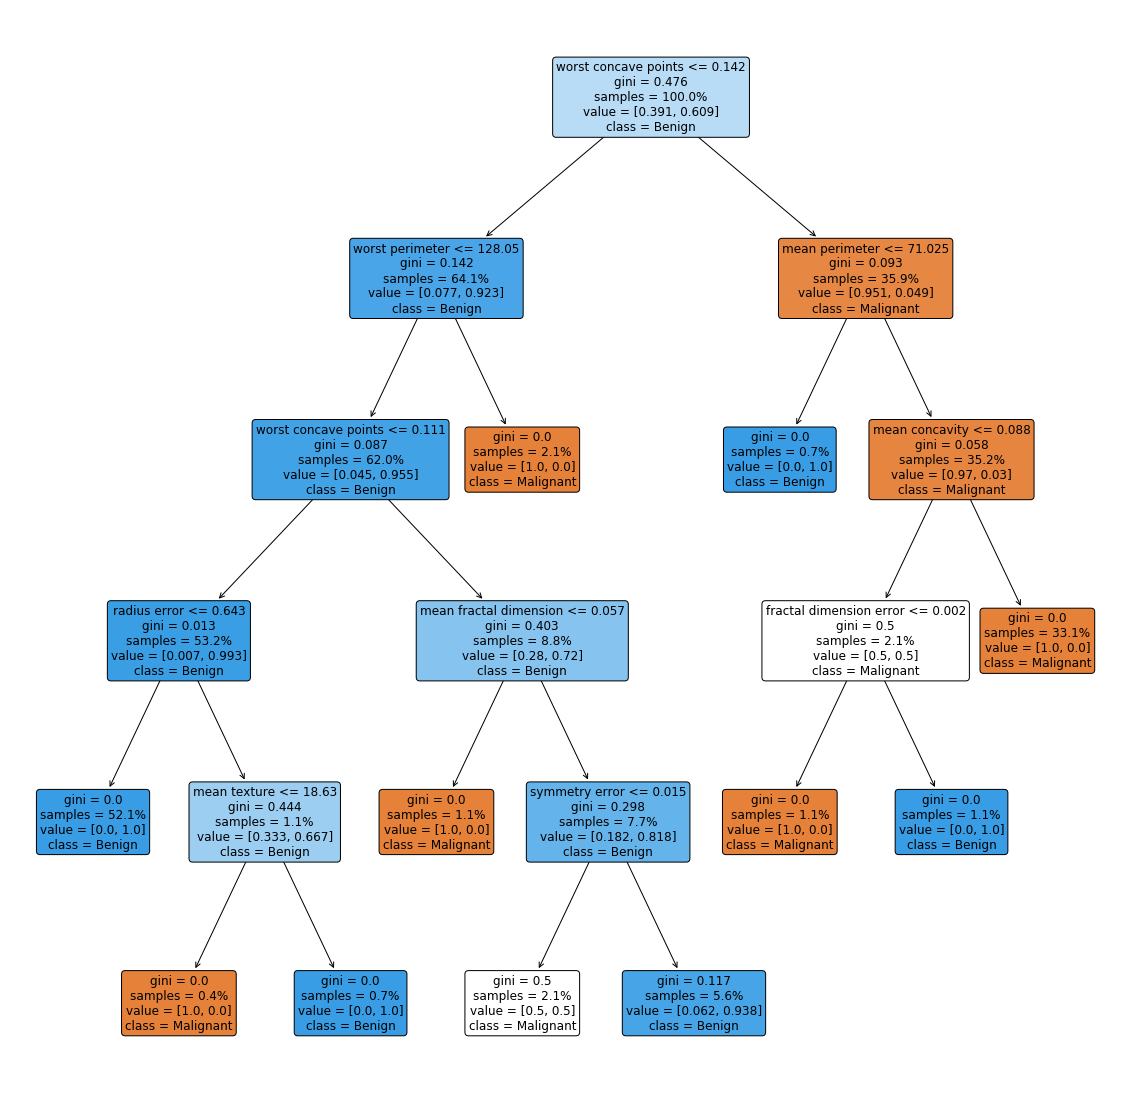

In [56]:
# decision tree
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))

p = plot_tree(dtree,
             feature_names = can_A_df.columns,
             class_names = ['Malignant','Benign'],
             filled = True,
             rounded = True,
             fontsize=12,proportion=True)

In [57]:
#calculate feature importance
dtree.feature_importances_

array([0.        , 0.01022829, 0.02830529, 0.        , 0.        ,
       0.        , 0.02163283, 0.        , 0.        , 0.02711427,
       0.00501254, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.01281442, 0.02301365,
       0.        , 0.        , 0.08111106, 0.        , 0.        ,
       0.        , 0.        , 0.79076764, 0.        , 0.        ])

In [58]:
# select features
feature_name = ['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension','radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error',
        'fractal dimension error','worst radius', 'worst texture',
        'worst perimeter', 'worst area', 'worst smoothness',
        'worst compactness', 'worst concavity', 'worst concave points',
        'worst symmetry', 'worst fractal dimension']
# write the feature_importance
a= dtree.feature_importances_
b = feature_name
c = pd.DataFrame({'feature_name' : b, 'Importance_value': a} )
c = c.sort_values(by='Importance_value', ascending=False)
c

,feature_name,Importance_value
27,worst concave points,0.790768
22,worst perimeter,0.081111
2,mean perimeter,0.028305
9,mean fractal dimension,0.027114
19,fractal dimension error,0.023014
6,mean concavity,0.021633
18,symmetry error,0.012814
1,mean texture,0.010228
10,radius error,0.005013
20,worst radius,0.000000



1. Structure Description :The decision tree is able to make predictions based on the importance of different features present in the data set.. We see that 'worst_cancave_points' has highest feature importance hence first split is made on this attribute, followed by worst_perimeter,mean_perimeter and so on.We initially start at the root node at depth 0 and move downwards.The fist question by the DT is asked on worst_concave_point if the value of the sample for this feature is less than the obtained value we move to left child node otherwise we move to the right child node and so.
2. Explanation of entries in first node : 
   - worst_concave_point : These are the worst/lowest values of the indentations in the cell nucleus. It is yhe first parameter for making predictions in the decision tree as it has the highest feature importance.
   - Gini impurity : It measures the impurity of a sample i.e. whether a node is pure(gini = 0) if all training instances it applies to belongs to the same class. Here in rood node gini=0.476 which means some impurity is still present and the data has be split further by asking second question .
   - Value : The value attribute tells us how many training instances of each class of the breast cancer data set the root node applies to. i.e. 39% malignant and 60% benign.
   - Samples : This indicates the percentage of the samples used for making the predictions.Since the first node is the root node all the samples are used to make the predictions.
   - Class : This is the predicted class of the node in the root node it is identified as benign class.
3. By analysing the features in the decision tree and the initial candidate features from Section 1 we see that some features are matching each other where as some are not i.e.

Matching :
1. Worst Perimeter.  
3. Worst Concave Points
    
Not Matching : 
1. Mean Concave Points
2. Worst Area
3. Worst Radius

Displaying the decision boundaries (use function predict()) together with a scatter plot of the data using two features at a time. 

In [59]:
imp=[]
index_col=[]
for importance,name in sorted(zip(pipeline.steps[1][1].feature_importances_, X_train.columns),reverse=True)[:5]:
    imp.append(name)
for t in imp:
    col=can_A_df.columns.get_loc(t)
    index_col.append(col)    

print("Top 5 most important columns are\n")
for name in imp:
    print(name)
print("\nThe index of top 5 important feature is:",index_col)

Top 5 most important columns are

worst concave points
worst perimeter
worst area
mean fractal dimension
mean smoothness

The index of top 5 important feature is: [27, 22, 23, 9, 4]


C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarn

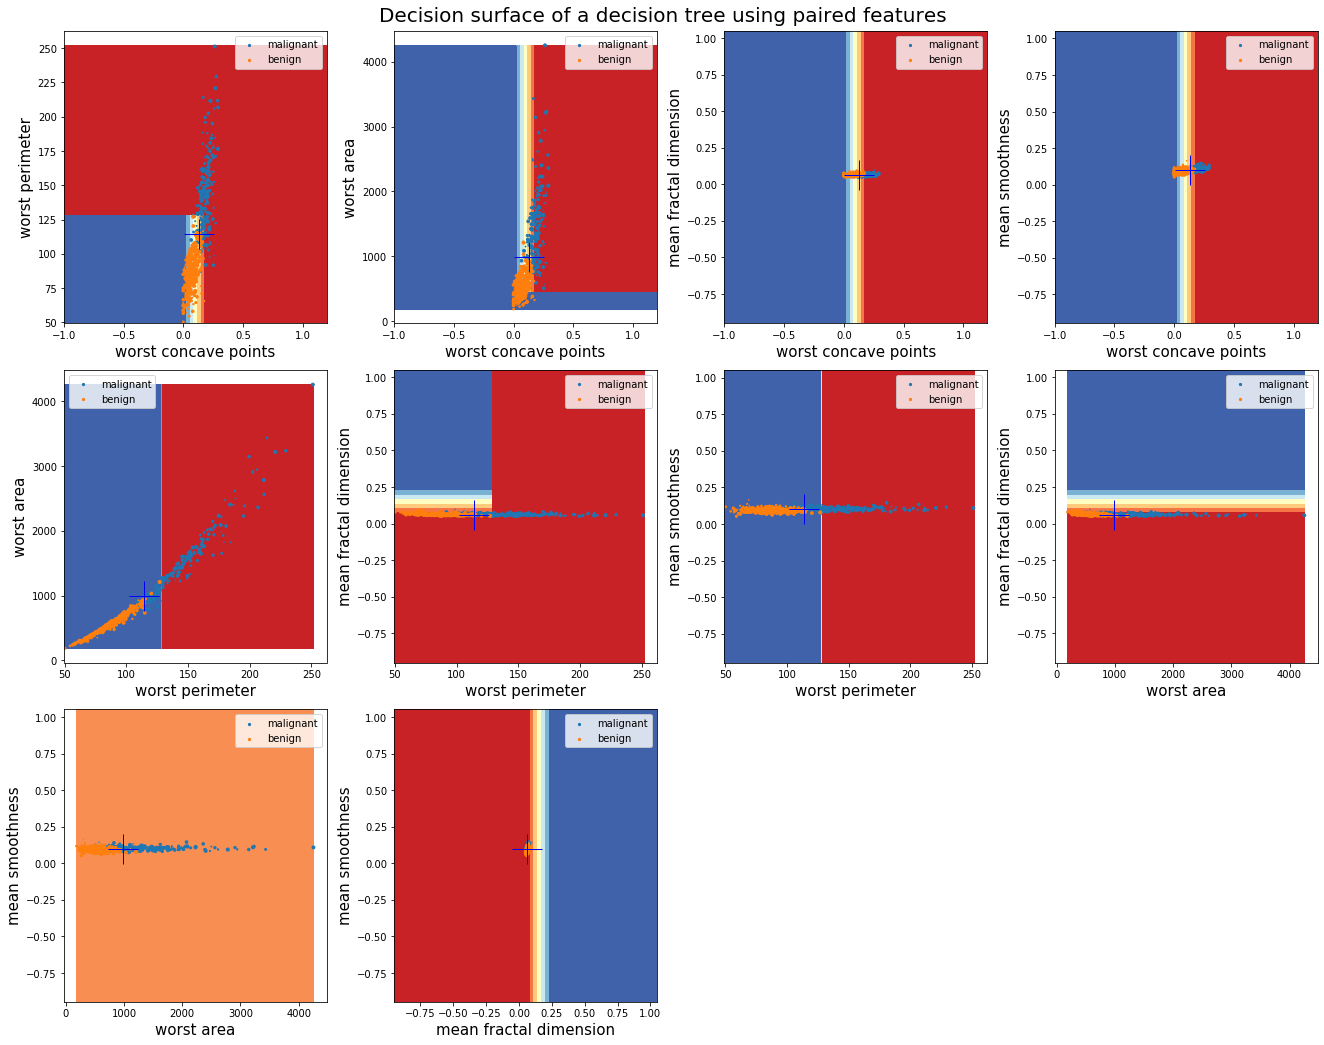

In [60]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 18.5)
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_step = .2

f1=index_col[0]
f2=index_col[1]
f3=index_col[2]
f4=index_col[3]
f5=index_col[4]
levels=np.arange(-0.1,10,0.1)

for pairidx, pair in enumerate([[f1,f2] , [f1, f3], [f1, f4],[f1, f5],[f2, f3],
                                [f2, f4],[f2,f5], [f3,f4 ],[f3, f5], [f4, f5]]):
    # We only take the two corresponding features
    X = cancer.data[:, pair]
    y = cancer.target

    # Plot the decision boundary
    plt.subplot(4, 4, pairidx + 1)
    # Make a meshgrid
    xmin, xmax = X[:, 0].min()-1 , X[:, 0].max()+1 
    ymin, ymax = X[:, 1].min()-1 , X[:, 1].max()+1 
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step),
                         np.arange(ymin, ymax, plot_step))
    mid=((X[:, 1].mean(),X[:, 0].mean()))

    #Creating a new array to put the values of analysis point for the respective features by multiplying with analysis point 
    rows=xx.shape[0]*xx.shape[1]
    narray=[]
    for i in range(rows):
        narray.append([1]*30)
    narray=np.array(narray)
    narray=np.c_[narray]
    
    #Multiplying analysis point with new array
    ap_array=np.array(ana_pt)
    narray=narray*ap_array
    narray[:,pair[0]]=xx.ravel()
    narray[:,pair[1]]=yy.ravel()

    
    
    #Predict and plot contours
    K = pipeline.predict(narray)
    K = K.reshape(xx.shape)
    cs = plt.contourf(xx, yy, K,cmap=plt.cm.RdYlBu)
    
    #labling the columns
    plt.xlabel(cancer.feature_names[pair[0]],size=15)
    plt.ylabel(cancer.feature_names[pair[1]],size=15)
    plt.axis("tight")

    # Plot the training points
    for s in zip(range(n_classes)):
        idt = np.where(y == s)
        plt.scatter(X[idt, 0], X[idt, 1],levels,label=cancer.target_names[s],
                    cmap=plt.cm.RdYlGn)
    plt.axis("tight")
    plt.plot(ap_array[pair[0]],ap_array[pair[1]],marker='+',markersize=30,color="Blue")
    plt.legend()
    plt.tight_layout()

plt.suptitle("Decision surface of a decision tree using paired features", size=20, y=1.010)

plt.show()

Training a support vector classifier with RBF kernel 

Constructing a support vector classifier with a radial basis function kernel. i will perform a hyper parameter search of C and gamma. Check the following remaining parameters of the classifier and either keeping the default value or selecting a different value: tol, class_weight and max_iter. Question: Describe each choice briefly in one sentence.

In [61]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Create a svm Classifier
svc = SVC(kernel='rbf',gamma='scale') # Linear Kernel
#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)


C:\Users\npath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [62]:
target = ['Malignant','Benign']
print('Test Data Evaluation :\n')
print('Confusion matrix is as follows : \n',metrics.confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report : \n',metrics.classification_report(y_test, y_pred,target_names=target))
print('\n')
accuracy = round(metrics.accuracy_score(y_test, y_pred),4)
print('Accuracy score on training data : ',accuracy)

Test Data Evaluation :

Confusion matrix is as follows : 
 [[ 78  23]
 [  1 183]]


Classification report : 
               precision    recall  f1-score   support

   Malignant       0.99      0.77      0.87       101
      Benign       0.89      0.99      0.94       184

    accuracy                           0.92       285
   macro avg       0.94      0.88      0.90       285
weighted avg       0.92      0.92      0.91       285



Accuracy score on training data :  0.9158



* class_weight = The default value is balanced. It is used to provide a weight to the output of each class.It is particularly useful when the dataset present is imbalanced.
* tol = (default value is=1e-3) : It is the tolerence for the stopping criterion.
* max_iterint= The default value for this criterion is -1 .It is the hard limit on iterations with the presence of a solver.It is -1 for no limit.

Building a pipeline including any pre-processing steps that you think are necessary. 

In [63]:
stepper = [('scaler', StandardScaler()), ('svc', SVC(kernel='rbf',gamma='scale'))]
pipeline12 = Pipeline(stepper)

In [64]:
pipeline12.fit(X_train,y_train)

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('svc',
                 SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                     decision_function_shape='ovr', degree=3, gamma='scale',
                     kernel='rbf', max_iter=-1, probability=False,
                     random_state=None, shrinking=True, tol=0.001,
                     verbose=False))],
         verbose=False)

In [65]:
#Predict the response for test dataset
y_pred = pipeline12.predict(X_test)

target = ['Malignant','Benign']
print('evaluation on test data :\n')
print('Confusion matrix : \n',metrics.confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report : \n',metrics.classification_report(y_test, y_pred,target_names=target))
print('\n')
acc = round(metrics.accuracy_score(y_test, y_pred),4)
print('Accuracy score on training data : ',acc)

evaluation on test data :

Confusion matrix : 
 [[ 96   5]
 [  3 181]]


Classification report : 
               precision    recall  f1-score   support

   Malignant       0.97      0.95      0.96       101
      Benign       0.97      0.98      0.98       184

    accuracy                           0.97       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.97      0.97      0.97       285



Accuracy score on training data :  0.9719



1. After scaling the data in SVC the accuracy is increased form 91% to 97%. So, yes scaling was necessary for SVM classifier.
2. Data needs to be scaled for support vector classifier.SVM has a tendency to  maximize the distance between the separating plane and the support vectors. If any of the feature has very large values then it will dominate the other features when calculating the distance. After sclaling all  features have the same influence on the distance metric.


Performing a grid search using five-fold cross validation over values of the regularisation parameter C and the kernel coefficient gamma. 

In [66]:
grid_param = [{ 'svc__C' : [0.1,10,100,1000] ,'svc__gamma' : [0.01, 0.1 , 1 , 10 , 100]}]

In [67]:
grid = GridSearchCV(pipeline12, param_grid=grid_param, cv=5)

In [68]:
grid.fit(X_train, y_train.values.ravel())

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight=None, coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='scale',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
                                            tol=0.001, verbose=False))],
                          

In [69]:
#Predict the response for test dataset
y_pred = grid.predict(X_test)

target = ['Malignant','Benign']
print('Test data evaluation :\n')
print('Confusion matrix : \n',metrics.confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report : \n',metrics.classification_report(y_test, y_pred,target_names=target))
print('\n')
acc = round(metrics.accuracy_score(y_test, y_pred),4)
print('Accuracy score on training data : ',acc)

Test data evaluation :

Confusion matrix : 
 [[ 97   4]
 [  3 181]]


Classification report : 
               precision    recall  f1-score   support

   Malignant       0.97      0.96      0.97       101
      Benign       0.98      0.98      0.98       184

    accuracy                           0.98       285
   macro avg       0.97      0.97      0.97       285
weighted avg       0.98      0.98      0.98       285



Accuracy score on training data :  0.9754


In [70]:
grid.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

In [71]:
print(grid.score(X_train,y_train))

0.9823943661971831


In [72]:
print(grid.score(X_test,y_test))

0.9754385964912281



The best parameter are 
- C(regularization parameter ) = 10
- gamma (kernel coefficient) = 0.01

The rationale for my choice is that :
- Reason for gamma : If the model overfits we use use small values for gamma and if the model underfits we use larger gamma values so I chose the range from 0.01 to 100.
- Reason for C : Similarily if model overfits we use small values for C hence I chose value range from 0.01 to 1000.

Evaluating the support vector classifier (20%)



In [73]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Create a svm Classifier
svc = SVC(kernel='rbf',gamma='scale') # Linear Kernel
#Train the model using the training sets
svc.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = svc.predict(X_test)

C:\Users\npath\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [74]:
target = ['Malignant','Benign']
print('evaluation on test data :\n')
print('Confusion matrix : \n',metrics.confusion_matrix(y_test, y_pred))
print('\n')
print('Classification report : \n',metrics.classification_report(y_test, y_pred,target_names=target))
print('\n')
accuracy = round(metrics.accuracy_score(y_test, y_pred),4)
print('Accuracy score on training data : ',accuracy)

evaluation on test data :

Confusion matrix : 
 [[ 78  23]
 [  1 183]]


Classification report : 
               precision    recall  f1-score   support

   Malignant       0.99      0.77      0.87       101
      Benign       0.89      0.99      0.94       184

    accuracy                           0.92       285
   macro avg       0.94      0.88      0.90       285
weighted avg       0.92      0.92      0.91       285



Accuracy score on training data :  0.9158


In [75]:
print ('Recall:', round(recall_score(y_test, y_pred),4))
print ('Precision:', round(precision_score(y_test, y_pred),4))

Recall: 0.9946
Precision: 0.8883




Strengths :
 * The precision to detect cancer is high, 99%
* The recall is low, 88%
* The hyperparameters need not be tuned much

Weakness:
- Some preprocessing of the data is required initially

Probability of failing to detect a sample with cancer is = 0.1%(100-Recoilscore)

Displaying the decision boundary (use function decision_function()) together with a scatter plot of the data using the same features and figure layout as in the decision tree display for direct comparability. This time, using a suitable colormap (parameter “cmap”) in the contourf() function. Mark the support vectors. 

In [76]:
clf = pipeline.steps[1][1]

C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
C:\Users\npath\Anaconda3\lib\site-packages\matplotlib\collections.py:857: RuntimeWarn

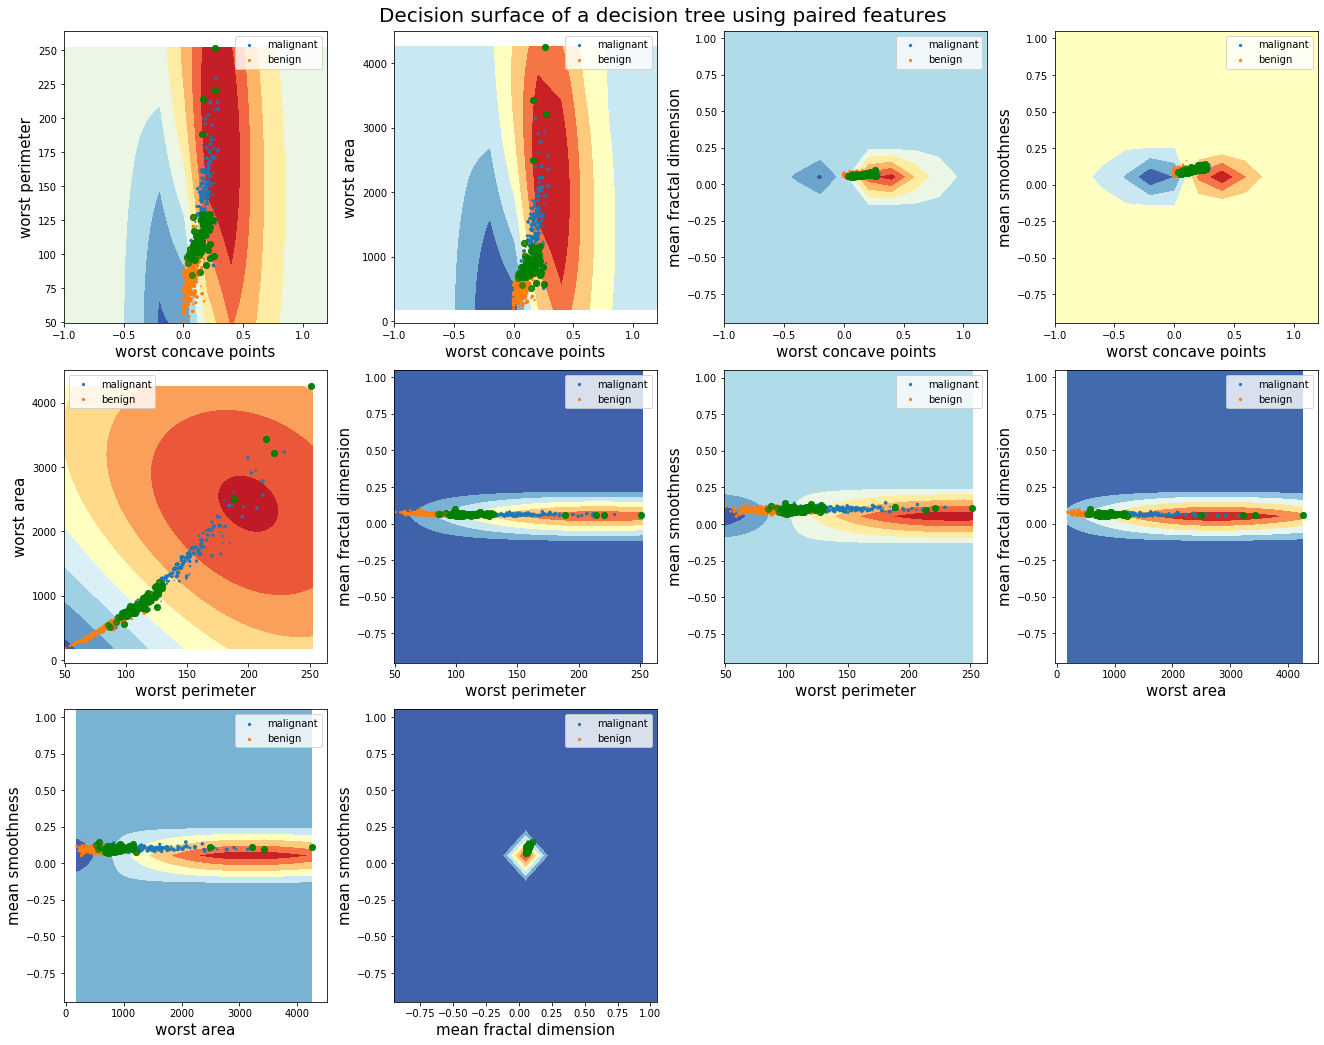

In [77]:
import matplotlib
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(18.5, 18.5)
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

# Parameters
n_classes = 2
plot_step = .2

f1=index_col[0]
f2=index_col[1]
f3=index_col[2]
f4=index_col[3]
f5=index_col[4]
levels=np.arange(-0.1,10,0.1)

for pairidx, pair in enumerate([[f1,f2] , [f1, f3], [f1, f4],[f1, f5],[f2, f3],
                                [f2, f4],[f2,f5], [f3,f4 ],[f3, f5], [f4, f5]]):
    # We only take the two corresponding features
    X = cancer.data[:, pair]
    y = cancer.target

    # Plot the decision boundary
    plt.subplot(4, 4, pairidx + 1)
    # Make a meshgrid
    xmin, xmax = X[:, 0].min()-1 , X[:, 0].max()+1 
    ymin, ymax = X[:, 1].min()-1 , X[:, 1].max()+1 
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step),
                         np.arange(ymin, ymax, plot_step))
    mid=((X[:, 1].mean(),X[:, 0].mean()))

    #Creating a new array to put the values of analysis point for the respective features by multiplying with analysis point 
    rows=xx.shape[0]*xx.shape[1]
    narray=[]
    for i in range(rows):
        narray.append([1]*30)
    narray=np.array(narray)
    narray=np.c_[narray]
    
    #Multiplying analysis point with new array
    ap_array=np.array(ana_pt)
    narray=narray*ap_array
    narray[:,pair[0]]=xx.ravel()
    narray[:,pair[1]]=yy.ravel()

    
    
    #Predict and plot contours
    K = pipeline12.decision_function(narray)
    K = K.reshape(xx.shape)
    cs = plt.contourf(xx, yy, K,cmap=plt.cm.RdYlBu)
    
    #labling the columns
    plt.xlabel(cancer.feature_names[pair[0]],size=15)
    plt.ylabel(cancer.feature_names[pair[1]],size=15)
    plt.axis("tight")

    # Plot the training points
    for s in zip(range(n_classes)):
        idt = np.where(y == s)
        plt.scatter(X[idt, 0], X[idt, 1],levels,label=cancer.target_names[s],
                    cmap=plt.cm.RdYlGn)
        x_vec = []
        y_vec = []
        for k in svc.support_vectors_:
            x_vec.append(k[pair[0]])
            y_vec.append(k[pair[1]])
        plt.scatter(x_vec,y_vec,color = 'green',marker = 'o',alpha = 0.7)
        plt.legend(loc = 'upper right')
        plt.axis("tight")
        plt.legend()
        plt.tight_layout()

         
plt.suptitle("Decision surface of a decision tree using paired features", size=20, y=1.010)

plt.show()

 What is the meaning of the support vectors? Where can we see their purpose in the diagrams?

 It is a model that performs classification by finding the hyperplane that maximizes the margin between the two classes. Support vectors are vectors that define the hyper plane.

Purpose of SVM :
* It defines an optimal hyperplane  which is used to maximize margins.
* It is a  non-linearly separable problems:  a penalty is assigned to term for misclassifications.
* The data is plotted to higher dimention  where it is easier to classify with linear decision surfaces: this means to reformulate problem so that data is mapped implicitly to this space.

Purpose of SVM in diagram :
- The classification line in SVM is used not only for seperating the two classes but it also stays as far away from the closest training instances as possible. 
- It assigns a large margin between the support vectors. This is known as large margin classification.
- Feature scales affect SVM , after scaling the decision boundary will be a lot better in case of SVM

6	Compare the classifiers and interpret (15%)

6.1	Question: Compare the classifier structures and decision boundaries of both classifiers. Point out similarities and differences. How do the classifiers compare outside the areas of dense sampling in the parameter space, e.g. towards the edges of the scatterplot (extrapolation)?

Answer: By observing  the Decision tree classifier we observe that it has a rigid pattern and with the help of nodes and branches analysis is made.Where as in SVM contours are observed.

The decision boundry in SVC are generated outside the areas of dense sampling where as the Decicion boundry in Decision tree are more rigid and for few graphs in Decicion tree hence we are unable to see the decicion boundry.

Both the classifiers have high precision and recall .

SVM has a good decision boundry compared to Decision tree classifier.SVM is hence more favourable DT as it is much more better in its classification boundries.

6.2	Question: Generalisability: Do you see sources of bias in the two classifiers? Are the models showing any signs of overfitting (variance error)?

Answer:  The error in the model is termed as bias,If the model cant predict actual values and capture true relationship between features.
Difference in fit of training and testing dataset is called variance.. It is the dispersion of predicted values over target values
As the precision and recoil of both the model are high the bias and variance in the model are not significant.

6.3	Question: Table 1 from Street et al. (1993) below shows the accuracies of their classifiers for different numbers of features and different numbers of hyperplanes used. Compare the number of features (decision tree), selection of features and accuracy of your classifiers with this table. Is there only one good set of features, many different sets or is there a pattern of similar feature combinations?

Answer:

In [82]:
for i in range(1,20):
    clf=DecisionTreeClassifier(criterion='gini',random_state=0,max_depth=5,min_samples_leaf=5,class_weight='balanced',max_features=i)
    clf.fit(X_train,y_train)
    y_pred=clf.predict(X_test)
    score=accuracy_score(y_pred,y_test)
    print("Accuracy when selecting",i,"features is",round(score*100,2))

Accuracy when selecting 1 features is 90.53
Accuracy when selecting 2 features is 90.18
Accuracy when selecting 3 features is 89.82
Accuracy when selecting 4 features is 90.53
Accuracy when selecting 5 features is 91.58
Accuracy when selecting 6 features is 91.23
Accuracy when selecting 7 features is 91.23
Accuracy when selecting 8 features is 92.28
Accuracy when selecting 9 features is 91.23
Accuracy when selecting 10 features is 95.44
Accuracy when selecting 11 features is 90.88
Accuracy when selecting 12 features is 90.88
Accuracy when selecting 13 features is 92.98
Accuracy when selecting 14 features is 94.74
Accuracy when selecting 15 features is 92.28
Accuracy when selecting 16 features is 92.63
Accuracy when selecting 17 features is 92.98
Accuracy when selecting 18 features is 92.98
Accuracy when selecting 19 features is 92.98


Accuracy varies for each feature.Hence no specific feature gives the best result.